# Data Preprocessing, Standardization, and K-means clustering

We take our cleaned and formatted data and perform a number of steps to the data to preprocess and standardize before it is ready to use with our K-Means algorithm

## Import libraries

In [184]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

## Import Data

In [185]:
clean_data = pd.read_csv('../data/cleaned_data.csv')

# Preprocessing

## Label Encoding/One Hot Encoding

We need to have our data as numerical for the k-means clustering algorithm. Categorical data such as the column for "Study" pose a problem as the k-means algorithm cannot assign an appropriate value to a string. Two techniques that can solve this problem are label encoding and one hot encoding. Label encoding assigns a numerical value but this does not work for our dataset as it will assign values (1, 2, 3, etc.) which may imply a hierarchy that is not present in our data between each Study. We therefore explore the second option of one hot encoding which creates a new column for each of the 10 studies and then assigns the value 0 if it is not from this study or a 1 if it is. One hot encoding can cause problems when there are many categories but in this case we deemed it appropriate for use. 

We will use the label encoding technique to convert categorical variables to numbers and then use the one hot encoding toolkit from scikit-learn to convert these into binary values. Scikit-learn has a useful preprocessing module for this

### Label Encoder

In [186]:
# create instance of labelencoder
labelencoder = LabelEncoder()
# Assign numerical values and store in a new column
clean_data['Study_no'] = labelencoder.fit_transform(clean_data['Study'])

Display this new column

In [187]:
clean_data

,Unnamed: 0,index,1,2,3,4,tot_win,tot_los,Subj,Study,Unique_ID,balance,Payoff,Study_no
0,0,Subj_1,12,9,3,71,5800,-4650,1,Fridberg,1,1150,1,0
1,1,Subj_2,24,26,12,33,7250,-7925,2,Fridberg,2,-675,1,0
2,2,Subj_3,12,35,10,38,7100,-7850,3,Fridberg,3,-750,1,0
3,3,Subj_4,11,34,12,38,7000,-7525,4,Fridberg,4,-525,1,0
4,4,Subj_5,10,24,15,46,6450,-6350,5,Fridberg,5,100,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,93,Subj_94,24,69,13,44,12150,-11850,94,Wetzels,613,300,2,7
613,94,Subj_95,5,31,46,68,9300,-7150,95,Wetzels,614,2150,2,7
614,95,Subj_96,18,19,37,76,9350,-7900,96,Wetzels,615,1450,2,7
615,96,Subj_97,25,30,44,51,10250,-9050,97,Wetzels,616,1200,2,7


### One Hot Encoding

In [188]:
# create instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing on Study_no column values
enc_df = pd.DataFrame(enc.fit_transform(clean_data[['Study_no']]).toarray())

# rename columns as Study names
enc_df = enc_df.rename(columns={0: 'Fridberg', 1: 'Horstmann', 2: 'Kjome', 3: 'Maia', 6: 'SteingroverInPrep', 4: 'Premkumar', 8: 'Wood', 9: 'Worthy', 5: 'Steingroever2011', 7: 'Wetzels'})

# reset index before concatenation
clean_data.reset_index(inplace=True)
enc = pd.concat([clean_data, enc_df], axis=1)
enc

,level_0,Unnamed: 0,index,1,2,3,4,tot_win,tot_los,Subj,...,Fridberg,Horstmann,Kjome,Maia,Premkumar,Steingroever2011,SteingroverInPrep,Wetzels,Wood,Worthy
0,0,0,Subj_1,12,9,3,71,5800,-4650,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,Subj_2,24,26,12,33,7250,-7925,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,Subj_3,12,35,10,38,7100,-7850,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,Subj_4,11,34,12,38,7000,-7525,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,Subj_5,10,24,15,46,6450,-6350,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,612,93,Subj_94,24,69,13,44,12150,-11850,94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
613,613,94,Subj_95,5,31,46,68,9300,-7150,95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
614,614,95,Subj_96,18,19,37,76,9350,-7900,96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
615,615,96,Subj_97,25,30,44,51,10250,-9050,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Drop columns

In [189]:
df = enc.drop(columns=['level_0', 'index', 'Subj', 'Study', 'Study_no', 'Unnamed: 0', "Unique_ID", "balance"])
df

,1,2,3,4,tot_win,tot_los,Payoff,Fridberg,Horstmann,Kjome,Maia,Premkumar,Steingroever2011,SteingroverInPrep,Wetzels,Wood,Worthy
0,12,9,3,71,5800,-4650,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,26,12,33,7250,-7925,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,35,10,38,7100,-7850,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,34,12,38,7000,-7525,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,24,15,46,6450,-6350,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,24,69,13,44,12150,-11850,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
613,5,31,46,68,9300,-7150,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
614,18,19,37,76,9350,-7900,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
615,25,30,44,51,10250,-9050,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Standardization

Generally speaking, learning algorithms perform better with standardized data. In our case there is a large variety in the 0 and 1 values for the studies and the total win and total loss values and so we have chosen to standardize the whole data set. Scitkit-learn again offers a way to do this using the preprocessing module.

In [190]:
scaler = preprocessing.StandardScaler().fit(df)
X_scaled = scaler.transform(df)

In [191]:
X_scaled

array([[-0.47711539, -1.38690362, -1.0891972 , ..., -0.26679684,
        -0.57423112, -0.2452294 ],
       [ 1.02418608, -0.42018166, -0.66885443, ..., -0.26679684,
        -0.57423112, -0.2452294 ],
       [-0.47711539,  0.09161232, -0.76226394, ..., -0.26679684,
        -0.57423112, -0.2452294 ],
       ...,
       [ 0.27353534, -0.81824364,  0.49876436, ...,  3.74817029,
        -0.57423112, -0.2452294 ],
       [ 1.14929454, -0.19271767,  0.82569762, ...,  3.74817029,
        -0.57423112, -0.2452294 ],
       [-0.60222385,  4.01536616, -0.94908294, ...,  3.74817029,
        -0.57423112, -0.2452294 ]])

In [192]:
X_scaled.std(axis=0)
X_scaled.mean(axis=0)

array([-2.30321794e-17, -5.75804486e-17,  2.30321794e-17, -2.30321794e-17,
       -1.38193077e-16,  2.76386153e-16, -9.21287178e-17,  3.45482692e-17,
        4.60643589e-17,  3.45482692e-17,  0.00000000e+00, -3.45482692e-17,
       -4.60643589e-17,  0.00000000e+00,  0.00000000e+00, -1.38193077e-16,
       -2.30321794e-17])

In [193]:
#rename columns to clearly represent decks
sd = pd.DataFrame(X_scaled, columns=['Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'tot_win', 'tot_los', 'Payoff', 'Fridberg', 'Horstmann', 'Kjome', 'Maia', 'Premkumar', 'Steingroever2011', 'SteingroverInPrep', 'Wetzels', 'Wood', 'Worthy'])
sd

,Deck_1,Deck_2,Deck_3,Deck_4,tot_win,tot_los,Payoff,Fridberg,Horstmann,Kjome,Maia,Premkumar,Steingroever2011,SteingroverInPrep,Wetzels,Wood,Worthy
0,-0.477115,-1.386904,-1.089197,2.131753,-1.471413,1.525683,-1.778972,6.335087,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,-0.266797,-0.574231,-0.245229
1,1.024186,-0.420182,-0.668854,0.038743,-0.538613,0.135451,-1.778972,6.335087,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,-0.266797,-0.574231,-0.245229
2,-0.477115,0.091612,-0.762264,0.314139,-0.635110,0.167288,-1.778972,6.335087,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,-0.266797,-0.574231,-0.245229
3,-0.602224,0.034746,-0.668854,0.314139,-0.699441,0.305250,-1.778972,6.335087,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,-0.266797,-0.574231,-0.245229
4,-0.727332,-0.533914,-0.528740,0.754773,-1.053262,0.804036,-1.778972,6.335087,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,-0.266797,-0.574231,-0.245229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,1.024186,2.025056,-0.622150,0.644614,2.613607,-1.530705,-0.262914,-0.157851,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,3.748170,-0.574231,-0.245229
613,-1.352875,-0.135852,0.919107,1.966515,0.780173,0.464437,-0.262914,-0.157851,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,3.748170,-0.574231,-0.245229
614,0.273535,-0.818244,0.498764,2.407149,0.812338,0.146063,-0.262914,-0.157851,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,3.748170,-0.574231,-0.245229
615,1.149295,-0.192718,0.825698,1.030169,1.391318,-0.342110,-0.262914,-0.157851,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,3.748170,-0.574231,-0.245229


## K- means clustering

Clustering involves grouping data points into groups that are similar to one another. It is an unsupervised technique using patterns within the data to decide upon the chosen groups. Within k means, the k represents the number of clusters we require. We choose this value for k and so the best way to determine the value of k is to run experiments for different values of k and then see which results in the least error. 

#### K means steps:

- The value of k must be decided
- k random points are selected as the initial centroids
- Each data point is assigned to a cluster based on their distance from the nearest initial centroid.
- A new centroid is then calculated from each cluster
- This process is iterated over until the data points settle in their appropriate cluster


## Choosing the value for k

We will explore the elbow method and the silhoutte coefficient to determine our value for k

In [194]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(sd)
    sse.append(kmeans.inertia_)

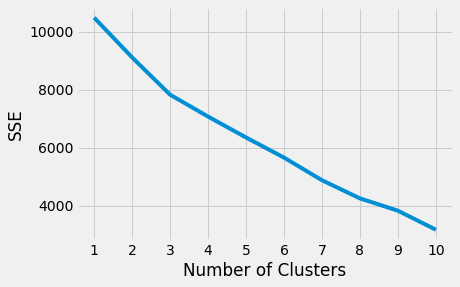

In [195]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [196]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(sd)
    score = silhouette_score(sd, kmeans.labels_)
    silhouette_coefficients.append(score)

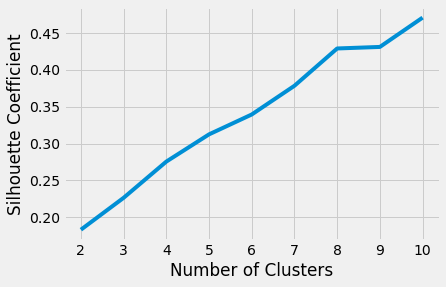

In [197]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## PCA dimensionality reduction

In [199]:
pca = PCA(2)

df = pca.fit_transform(sd)


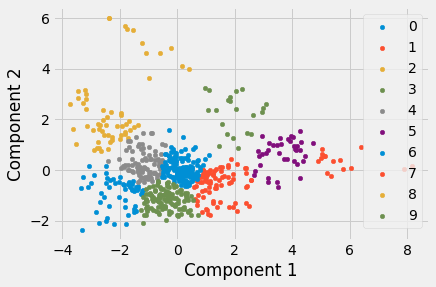

In [200]:
#w_out = pd.DataFrame(df, columns=['Component_1', 'Component_2'])
w_out_payoff = sd.drop(columns=["Payoff"])
w_out_payoff

pca = PCA(2)

w_out = pca.fit_transform(w_out_payoff)

kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(w_out)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(w_out[label == i , 0] , w_out[label == i , 1] , label = i, s=20)
plt.legend()
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


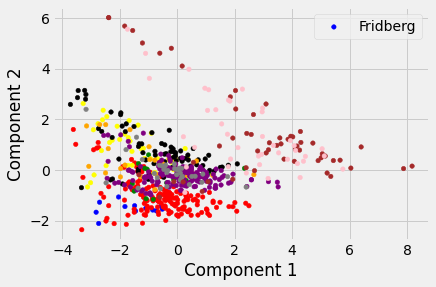

In [201]:
t = pd.DataFrame(w_out, columns=['Component_1', 'Component_2'])


t_labels = pd.concat([t, clean_data["Study"]], axis=1)

colors = {'Fridberg': 'blue','Horstmann': 'red','Kjome': 'green','Maia': 'yellow','SteingroverInPrep': 'black','Premkumar': 'orange','Wood': 'purple','Worthy': 'grey','Steingroever2011': 'brown','Wetzels': 'pink'}
#for i in range(618):
figure(figsize=(6, 4))
plt.scatter(t_labels['Component_1'], t_labels["Component_2"], c = t_labels["Study"].map(colors), s=20)
plt.legend(['Fridberg','Horstmann','Kjome','Maia','SteingroverInPrep','Premkumar','Wood','Worthy','Steingroever2011','Wetzels'])
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

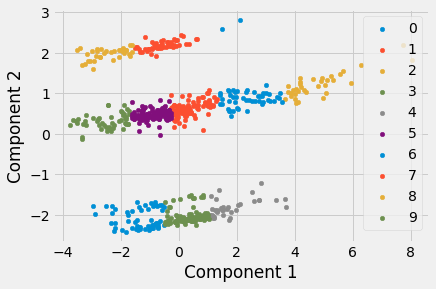

In [202]:
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i, s=20)
plt.legend()
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [203]:
tmp = pd.DataFrame(df, columns=['Component_1', 'Component_2'])


original_labels = pd.concat([tmp, clean_data[["Study", "Payoff"]]], axis=1)

In [204]:
original_labels

,Component_1,Component_2,Study,Payoff
0,-2.954758,1.588772,Fridberg,1
1,-0.803481,1.928634,Fridberg,1
2,-1.099105,2.030063,Fridberg,1
3,-1.279225,2.022929,Fridberg,1
4,-2.055069,1.879925,Fridberg,1
...,...,...,...,...
612,4.101098,1.061375,Wetzels,2
613,0.162405,0.589999,Wetzels,2
614,0.561677,0.383470,Wetzels,2
615,1.692721,0.610973,Wetzels,2


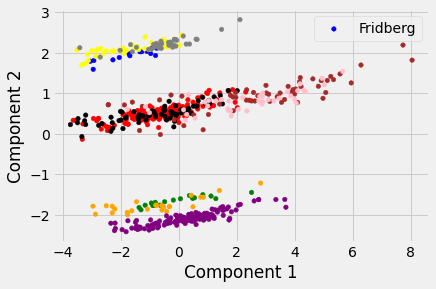

In [205]:
colors = {'Fridberg': 'blue','Horstmann': 'red','Kjome': 'green','Maia': 'yellow','SteingroverInPrep': 'black','Premkumar': 'orange','Wood': 'purple','Worthy': 'grey','Steingroever2011': 'brown','Wetzels': 'pink'}
#for i in range(618):
figure(figsize=(6, 4))
plt.scatter(original_labels['Component_1'], original_labels["Component_2"], c = original_labels["Study"].map(colors), s=20)
plt.legend(['Fridberg','Horstmann','Kjome','Maia','SteingroverInPrep','Premkumar','Wood','Worthy','Steingroever2011','Wetzels'])
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

## Analysis



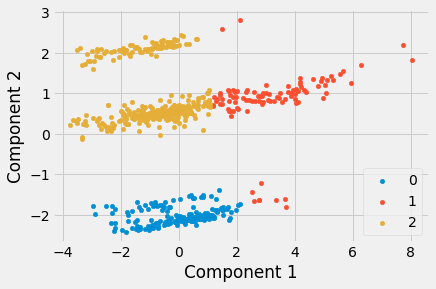

In [206]:
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i, s=20)
plt.legend()
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

No handles with labels found to put in legend.


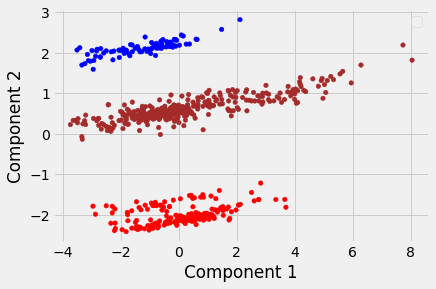

In [207]:
colors = {1: 'blue',2: 'brown',3:'red'}
#for i in range(618):
figure(figsize=(6, 4))
plt.scatter(original_labels["Component_1"], original_labels["Component_2"], c=original_labels["Payoff"].map(colors), s=20)
plt.legend()
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [208]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)
label = kmeans.fit_predict(sd)
print(label)
label.shape
# The lowest SSE value
kmeans.inertia_
# Final locations of the centroid
kmeans.cluster_centers_
# The number of iterations required to converge
kmeans.n_iter_
kmeans.labels_[:5]

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 

array([2, 2, 2, 2, 2], dtype=int32)